In [31]:
import pandas as pd
import pprint as pp
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

## 1. Reducing Features

In [22]:
# read in cleaned data

df = pd.read_csv("Data/data_cleaning_5.csv.gz")
df.shape

(44600, 1153)

In [23]:
# drop columns causing undistributed classification

col_queried = []
for col in df.columns.tolist():
    if 'overview' not in col:
        if 'original_lang' not in col: 
            if 'director' not in col:
                col_queried.append(col)
                
df = df[col_queried]
df.shape

(44600, 242)

In [24]:
# drop non-numeric and additional unnecesarry columns

df_numeric = df.drop(columns=['imdb_id', 'original_title', 'title', 'id', 'popularity', 'weighted_rating', 'vote_count', 'vote_average' ])

In [25]:
# scale the data

df_scaled = df_numeric.copy()
scaler = StandardScaler()
df_scaled[df_scaled.columns.tolist()] = scaler.fit_transform(df_numeric)
df_scaled.head()

,adult,belongs_to_collection,budget,homepage,revenue,runtime,spoken_languages,video,cast_size,crew_size,...,production_company_Shaw Brothers,production_company_Film i Väst,production_company_Nordisk Film,production_company_Film4,production_company_Lions Gate Films,production_company_TLA Releasing,production_company_Castle Rock Entertainment,release_year,release_month,release_day
0,-0.013394,2.999626,1.186774,2.192554,5.549635,-0.359011,-0.239708,-0.045216,0.041468,6.016529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131842,0.974522,1.700517
1,-0.013394,-0.333375,3.340612,-0.456089,3.783812,0.247075,1.090346,-0.045216,1.113478,0.356903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131842,1.526866,0.082170
2,-0.013394,2.999626,-0.167068,-0.456089,-0.137637,0.168020,-0.239708,-0.045216,-0.453306,-0.397714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131842,1.526866,0.837399
3,-0.013394,-0.333375,0.325238,-0.456089,0.892582,0.853160,-0.239708,-0.045216,-0.205919,-0.020405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131842,1.526866,0.837399
4,-0.013394,2.999626,-0.167068,-0.456089,0.814887,0.299778,-0.239708,-0.045216,-0.040994,-0.209059,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.131842,-1.234854,-0.457279


## 2. Kmeans

In [29]:
# Loop to save models for differing number of clusters

num_clusters = range(1, 30)
scores = []
models = []

for k in num_clusters:
    print(f"Applying {k} clusters...")
          
    kmeans =KMeans(n_clusters=k, random_state=64)
    model = kmeans.fit(df_scaled)
    models.append(model)
          
    score = np.abs(model.score(df_scaled))
    scores.append(score)

print("Completed.")

Applying 1 clusters...
Applying 2 clusters...
Applying 3 clusters...
Applying 4 clusters...
Applying 5 clusters...
Applying 6 clusters...
Applying 7 clusters...
Applying 8 clusters...
Applying 9 clusters...
Applying 10 clusters...
Applying 11 clusters...
Applying 12 clusters...
Applying 13 clusters...
Applying 14 clusters...
Applying 15 clusters...
Applying 16 clusters...
Applying 17 clusters...
Applying 18 clusters...
Applying 19 clusters...
Applying 20 clusters...
Applying 21 clusters...
Applying 22 clusters...
Applying 23 clusters...
Applying 24 clusters...
Applying 25 clusters...
Applying 26 clusters...
Applying 27 clusters...
Applying 28 clusters...
Applying 29 clusters...
Completed.


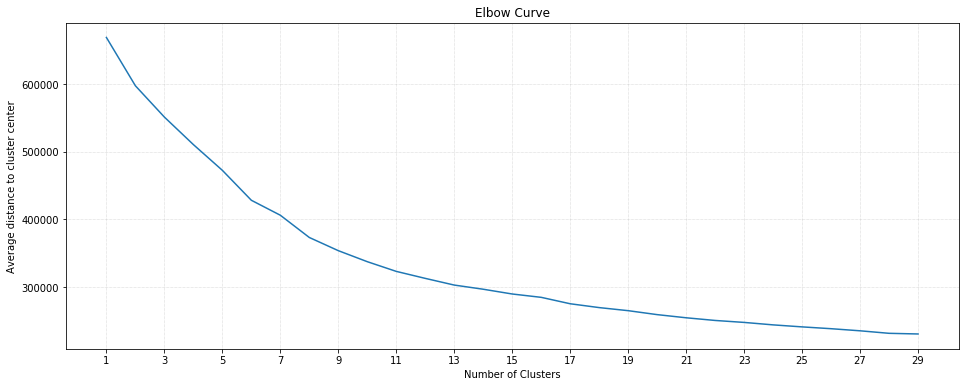

In [32]:
# plot to show average size of clusters (chose num_clusters value where there is "kink")

plt.figure(figsize=(16,6))
plt.plot(num_clusters, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Average distance to cluster center')
plt.title('Elbow Curve')
plt.xticks(range(1, 30, 2))
plt.grid(linestyle=':', linewidth=0.5)

Text(0.5,1,'Change of average distance to cluster center from n clusters to n+1 clusters')

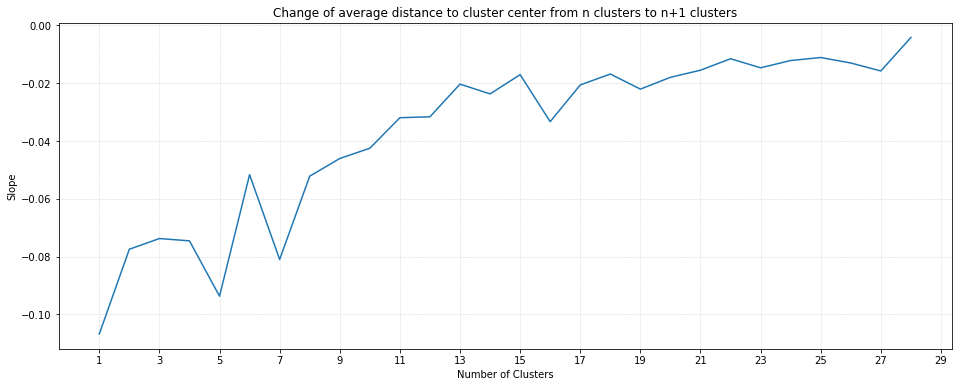

In [33]:
# plot to take a closer look at the slope change of pervious chart

plt.figure(figsize=(16,6))
yy = np.diff(scores) / scores[:-1]
plt.plot(range(1, len(yy)+1), yy)
plt.xticks(range(1, 30, 2))
plt.grid(linestyle=':', linewidth=0.5)
plt.xlabel('Number of Clusters')
plt.ylabel('Slope')
plt.title("Change of average distance to cluster center from n clusters to n+1 clusters")

In [34]:
# retrain KMeans algorithm with selected number of clusters

kmeans = KMeans(n_clusters=20)
kmeans = kmeans.fit(df_scaled)

In [36]:
# loops to classify every movie and show the count of each classification to see a reasonable distribution

movie_class = []
for movie in df_scaled.index.values:
    movie_class.append(kmeans.predict(df_scaled.loc[movie].values.reshape(1, -1)))
    
movie_class_ext = []
for movie in movie_class:
    movie_class_ext.append([movie][0][0])
    

pp.pprint(Counter(movie_class_ext))

Counter({4: 5389,
         3: 4269,
         0: 4091,
         15: 3948,
         2: 3740,
         14: 3489,
         11: 3315,
         1: 3261,
         6: 3215,
         12: 3120,
         18: 1932,
         8: 1880,
         19: 858,
         16: 833,
         13: 582,
         10: 287,
         17: 147,
         5: 145,
         9: 91,
         7: 8})


## 3. Save movie classifications

In [37]:
# create csv to save each movie classification with some additional data for web use later

lookup_df = pd.DataFrame(
    {'movieId': df["id"],
     'class': movie_class_ext,
     'rating': df["weighted_rating"] })

In [74]:
df_raw = pd.read_csv("Data/movies_Merged_Alldata.csv.gz")

In [75]:
df_joined = lookup_df.merge(df_raw, how="inner", left_on="movieId", right_on="id")

base_url = "http://image.tmdb.org/t/p/w185_and_h278_bestv2"
df_joined['poster_path_full'] = base_url + df_joined['poster_path']
df_final = df_joined[['class','movieId','rating','title', 'original_language', 'poster_path_full', 'release_date']]


In [76]:
df_final.head()

,class,movieId,rating,title,original_language,poster_path_full,release_date
0,10,862.0,7.684269,Toy Story,en,http://image.tmdb.org/t/p/w185_and_h278_bestv2...,1995-10-30
1,13,8844.0,6.876419,Jumanji,en,http://image.tmdb.org/t/p/w185_and_h278_bestv2...,1995-12-15
2,2,15602.0,6.158197,Grumpier Old Men,en,http://image.tmdb.org/t/p/w185_and_h278_bestv2...,1995-12-22
3,11,31357.0,5.674989,Waiting to Exhale,en,http://image.tmdb.org/t/p/w185_and_h278_bestv2...,1995-12-22
4,2,11862.0,5.624637,Father of the Bride Part II,en,http://image.tmdb.org/t/p/w185_and_h278_bestv2...,1995-02-10


In [77]:
df_final.to_csv("lookup.csv")